In [27]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

import utils as utl

# Load Raw Data

In [2]:
# load HDF file
dfs = pd.read_hdf('./data/Ballsystem_LegKinematics_DataStructures/P9_BPN/alldata_V3.h5')

# centers of the ball for each df in dfs
l_ball_c = [
    np.array([]),
    np.array([-5.75194107e-02, 4.08134419e+00, 9.06406343e+01]), # P9RT
    np.array([-3.60054343e-02, 3.83575489e+00, 9.06335406e+01]), # P9LT
]

In [37]:
# select one dataset
neuron = 1 # 0: BPN, 1: P9 right, 2: P9 left

# set df and ball center
df = dfs.loc[neuron, 'flydata']
ball_c = l_ball_c[neuron]

# some sets of columns
c_xyz = [c for c in df.columns if c[-2:] in ['_x', '_y', '_z']]
c_tag = [ c for c in c_xyz if 'TaG_' in c ]
c_ball = [ 'x_vel', 'y_vel', 'z_vel' ]


# TODO fix mapping in raw data
# leg2step = {
#     'R-F': 'R1',
#     'R-M': 'R2', 
#     'R-H': 'R3',
#     'L-F': 'L1',
#     'L-M': 'L2', 
#     'L-H': 'L3',}

leg2step = { # TODO workaround
    'R-F': 'L1',
    'R-M': 'L2', 
    'R-H': 'L3',
    'L-F': 'R1',
    'L-M': 'R2', 
    'L-H': 'R3',}

# raw joint positions
df_raw = df
df_raw

# distances for joints from center of ball
df_d = utl.dist_from_center(df_raw, ball_c)
df_d

df_raw

,flynum,tnum,fnum,SF,R-F-ThC_x,R-F-ThC_y,R-F-ThC_z,R-F-CTr_x,R-F-CTr_y,R-F-CTr_z,...,R3D_flex,x_vel,y_vel,z_vel,L1_stepcycle,L2_stepcycle,L3_stepcycle,R1_stepcycle,R2_stepcycle,R3_stepcycle
0,1,1,0,50,0.447842,-0.082255,90.162099,0.428111,0.285327,90.224269,...,165.944806,-8.966536,39.501225,-6.111826,True,False,True,False,True,True
1,1,1,1,50,0.443044,-0.076703,90.165093,0.454179,0.289512,90.241706,...,157.401748,-5.306577,29.933983,-5.147045,True,False,True,False,True,True
2,1,1,2,50,0.440302,-0.071109,90.167685,0.477816,0.293873,90.258627,...,153.974694,-2.536447,21.749070,-4.237362,True,False,True,False,True,True
3,1,1,3,50,0.439381,-0.067459,90.169225,0.488348,0.294814,90.271275,...,153.754412,-1.058212,15.675214,-3.417041,True,False,True,False,True,True
4,1,1,4,50,0.439682,-0.066430,90.169292,0.485028,0.294721,90.275570,...,153.738558,-0.599789,11.679823,-2.718597,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167995,12,10,13995,66,0.591032,-0.107136,90.200266,0.487122,0.285991,90.187401,...,90.220958,0.753555,0.015675,-3.319690,True,True,False,True,True,False
167996,12,10,13996,66,0.591264,-0.107397,90.200544,0.483842,0.284372,90.181718,...,88.753676,0.484582,-0.484582,-2.912541,True,True,False,True,True,False
167997,12,10,13997,66,0.591291,-0.107411,90.200806,0.480456,0.283259,90.177607,...,87.947005,-0.253000,-1.488069,-2.443118,True,True,False,True,True,False
167998,12,10,13998,66,0.591196,-0.107317,90.201133,0.476340,0.281996,90.174015,...,87.880259,-1.072911,-2.578118,-1.964747,True,True,False,True,True,False


# Plot stepcycles

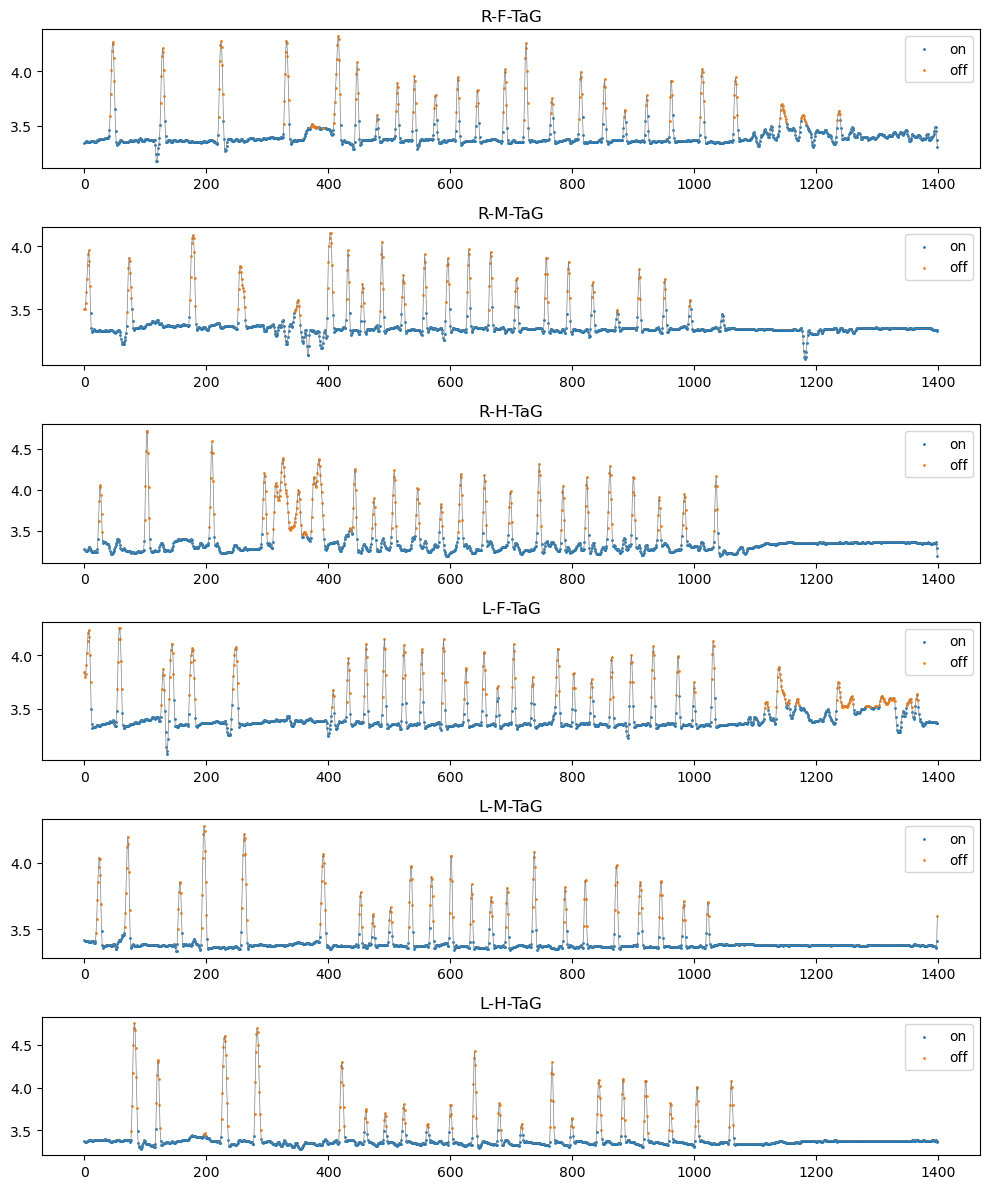

In [39]:
def plot_tag(df_raw, df_d, flynum, tnum, xlim=(None, None), ylim=(None, None), frames=(None, None), close_fig=False, path=''):

    df1 = df_raw.groupby('flynum').get_group(flynum)
    df1 = df1.groupby('tnum').get_group(tnum) # comment this line to look at all trials
    df2 = df_d.loc[df1.index, :]

    cols = [ c for c in df2.columns if 'TaG' in c ]

    n = len(cols)
    fig, axarr = plt.subplots(nrows=n, figsize=(10, 2*n))
    first_frame, last_frame = frames

    for c, ax in zip(cols, axarr):

        r = df2.loc[first_frame:last_frame, c]
        ax.plot(r, lw=0.5, c='gray')

        c_on = '{}_stepcycle'.format(leg2step[c[:3]])
        f_on = df1.loc[first_frame:last_frame, c_on]

        x = r.loc[f_on]
        ax.scatter(x.index, x.values, s=1, label='on')

        x = r.loc[~f_on]
        ax.scatter(x.index, x.values, s=1, label='off')

        ax.legend(loc='upper right')
        ax.set_title(c)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)


    fig.tight_layout()

    if path:
        fig.savefig(path)

    if close_fig:
        plt.close(fig)

flynum, tnum = 1, 1
plot_tag(df_raw, df_d, flynum, tnum, xlim=(None, None))

# create GIF

In [ ]:
import imageio.v2 as imageio
from pathlib import Path

def write_gif(inps, out, fps=30, force_overwrite=False, delete_inp=True):
    '''Generate GIF from list of files

    Parameters
    ----------
    inps : list
        Files to be concatenated in GIF
    out : path-like
        Name of the output file, has to have .gif suffix
    fps : int, optional
        Frames per second in GIF, by default 2
    force_overwrite : bool, optional
        If True, overwrite output file, by default False
    delete_inp : bool, optional
        If False, keep input files, by default True
    '''

    out = Path(out)
    if out.is_file() and not force_overwrite:
        print('WARNING: exiting because file {} already exists and force_overwrite is {}'.format(out, force_overwrite))
        return

    with imageio.get_writer(out, mode='I', fps=fps) as writer:
        for inp in inps:
            inp = Path(inp)
            img = imageio.imread(inp)
            writer.append_data(img)
            if delete_inp:
                inp.unlink(missing_ok=True)



frames = (400, 1000) # set range of frames to animate

l_png = [] # list of png
for f in np.arange(*frames):

    png = 'frame{}.png'.format(f)

    # plot and save file
    plot_tag(df_raw, df_d, flynum, tnum, xlim=(400, 1000), ylim=(3, 4.2), frames=(frames[0], f), path=png, close_fig=True)
    
    l_png.append(png) # collect png in list


write_gif(l_png, 'combined.gif', force_overwrite=True)

# Plot angle distributions

In [ ]:
col_ang = [c for c in df_raw.columns if c.split('_')[-1] in ['rot', 'flex', 'abduct'] ]

l_df = []
for i, n in enumerate(['BPN', 'P9r', 'P9l']):
    df = dfs.loc[i, 'flydata']
    for c in col_ang:
        x, t = c.split('_')
        l, j = x[:-1], x[-1:]

        d = pd.DataFrame(index=df.index, data={
            'ang': df.loc[:, c],
            'flynum': df.loc[:, 'flynum'],
            'tnum': df.loc[:, 'tnum'],
            'fnum': df.loc[:, 'fnum'],
            'SF': df.loc[:, 'SF'],
            'leg': l,
            'joint': j,
            'type': t,
            'P9': n,
        })
        l_df.append(d)
df = pd.concat(l_df)
df.loc[:, 'stim'] = df.loc[:, 'fnum'].apply(lambda x: (x % 1400 >= 400) & (x % 1400 <= 1000) )
df = df.loc[ df.loc[:, 'stim'] ]
df_ang = df

In [ ]:
for typ in ['flex', 'rot', 'abduct']:
    df = df_ang.groupby('type').get_group(typ)
    # df = df.groupby(['flynum', 'tnum']).get_group((1, 1))
    g = sns.FacetGrid(df, col='joint', row='leg', sharey=False)
    g.map_dataframe(sns.histplot, x='ang', hue='P9', kde=True, stat='density', common_norm=False)
    g.add_legend()
    g.fig.suptitle(typ)
    g.fig.savefig('plots/hist_p9_ang_{}.png'.format(typ))